## 【問題1】乱数の作成

平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

[[1.0, 0.8]    
[0.8, 1.0]]

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。

（参考）
np.random.multivariate_normal(mean, cov, size, check_valid, tol)
* mean: 生成したい正規分布の平均値ベクトルを指定
* cov: 生成したい正規分布の分散共分散行列を指定
* size: 生成する乱数の数を指定(default=1)
* check_valid: 分散共分散行列の半正定値チェック有無(warn/raise/ignoreを指定。オプション)
* tol: 半正定値チェックの許容誤差(オプション)

In [43]:
import numpy as np

mu = [-3, 0]
sigma = [[1.0, 0.8], [0.8, 1.0]]

np.random.seed(0)
random_data = np.random.multivariate_normal(mu, sigma, 500).reshape(500, 2)
# print(random_data)

## 【問題2】散布図による可視化

問題1で作成したデータ点を散布図により可視化してください。
散布図はmatplotlibのplt.scatter()を使うことで描けます。

（参考）
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)

Text(0, 0.5, 'x2')

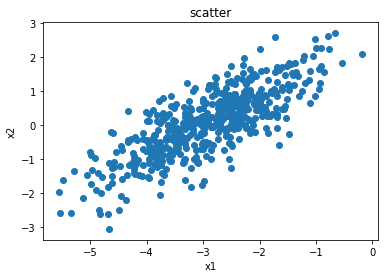

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

x = random_data[:,0]
y = random_data[:,1]

plt.scatter(x, y)
plt.title('scatter')
plt.xlabel("x1")
plt.ylabel("x2")

## 【問題3】ヒストグラムによる可視化

問題1で作成したデータをヒストグラムにより可視化してください。
ヒストグラムはplt.hist()を使うことで描けます。

matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation

各次元ごとに作成し、2つのヒストグラムとしてください。
それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation

（参考）matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)

Text(0, 0.5, 'frequency')

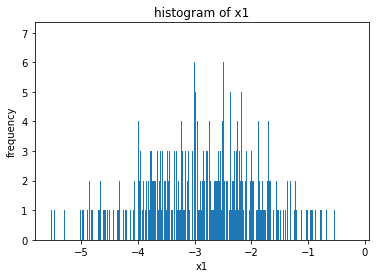

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

x_1 = random_data[:,0]
plt.hist(x_1, bins=len(x_1))
plt.title('histogram of x1')
plt.xlabel("x1")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

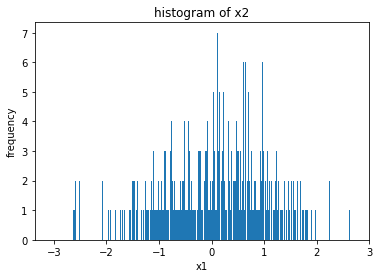

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

x_2 = random_data[:,1]
plt.hist(x_2, bins=len(x_2))
plt.title('histogram of x2')
plt.xlabel("x1")
plt.ylabel("frequency")

## 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

[[1.0, 0.8]    
[0.8, 1.0]]

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。

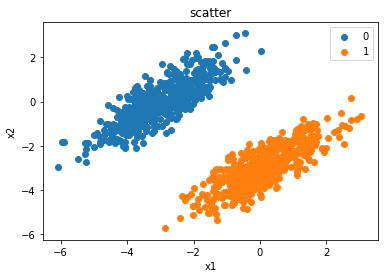

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

mu_0 = [-3, 0]
mu_1 = [0, -3]
sigma_0 = [[1.0, 0.8], [0.8, 1.0]]
sigma_1 = [[1.0, 0.8], [0.8, 1.0]]

random_data_0 = np.random.multivariate_normal(mu_0, sigma_0, 500).reshape(500, 2)
random_data_1 = np.random.multivariate_normal(mu_1, sigma_1, 500).reshape(500, 2)

x_0 = random_data_0[:,0]
y_0 = random_data_0[:,1]
x_1 = random_data_1[:,0]
y_1 = random_data_1[:,1]

plt.scatter(x_0, y_0, label="0")
plt.scatter(x_1, y_1, label="1")
plt.title('scatter')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

## 【問題5】データの結合

データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。

In [50]:
concat_random_data = np.concatenate([random_data_0, random_data_1])
print(concat_random_data)

[[-3.80965753 -0.24520748]
 [-2.63247046  0.4337565 ]
 [-3.28006393 -0.15263683]
 ...
 [-0.96110234 -2.64611556]
 [ 0.92174137 -2.19994573]
 [ 1.17578092 -1.87519405]]


## 【問題6】ラベル付け

ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。

0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。

機械学習に使用するデータセットはこのような形になっていることが多いです。

In [57]:
label_0 = np.zeros((500, 1))
label_1 = np.ones((500, 1))

concat_labels = np.concatenate([label_0, label_1])
labeled_concat_random_data = np.concatenate([concat_random_data, concat_labels], axis=1)

print(labeled_concat_random_data)
print(labeled_concat_random_data.shape)

[[-3.80965753 -0.24520748  0.        ]
 [-2.63247046  0.4337565   0.        ]
 [-3.28006393 -0.15263683  0.        ]
 ...
 [-0.96110234 -2.64611556  1.        ]
 [ 0.92174137 -2.19994573  1.        ]
 [ 1.17578092 -1.87519405  1.        ]]
(1000, 3)
